#  Import libraries and dataset

In [79]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
# Creating dataframe of the Data
df = pd.read_csv('6265982_1881064295_books.csv', error_bad_lines=False)  

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


# Descriptive analysis

In [3]:
# checking first 5 records of the data
df.head() 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
# checking columns of the data
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [5]:
#Checking shape of the data
print("Columns : ",df.shape[0])
print("Rows : ",df.shape[1])

Columns :  11123
Rows :  12


In [6]:
df.describe() # Statistical Summary of the data

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [7]:
df.info()  # Checking the datatypes of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [8]:
df.isnull().sum()  # Checking the missing or null values

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [9]:
# Lets do some datacleaning and feature engineering

In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
df['language_code'].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [12]:
df['language_code'].nunique()

27

In [13]:
# making data identical
encoding = {'language_code':{'en-US':'eng','en-GB':'eng', 'en-CA':'eng'}}  

In [14]:
df.replace(encoding, inplace=True)

In [15]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [16]:
# converting categorical data into numerical data
enc = OrdinalEncoder()

In [17]:
enc.fit(df[['language_code']])

OrdinalEncoder()

In [18]:
df[['language_code']] = enc.fit_transform(df[['language_code']])

In [19]:
df.language_code

0         2.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
11118     2.0
11119     2.0
11120     2.0
11121     2.0
11122    18.0
Name: language_code, Length: 11123, dtype: float64

In [20]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,2.0,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,2.0,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,2.0,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,2.0,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,2.0,2690,41428,164,9/13/2004,Scholastic


In [21]:
# Converting into proper date time format
df['publication_date'] = pd.to_datetime(df['publication_date'],errors='coerce' ,format='%m/%d/%Y')

In [22]:
nan_publication = df[df['publication_date'].isnull()]

In [23]:
nan_publication

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8177,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,2.0,718,10608,295,NaT,Bantam Books
11094,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,4.0,640,15,2,NaT,Folio histoire


# Since there are two dates which are not available, so we will drop them from our datset

In [24]:
nan_publication

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8177,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,2.0,718,10608,295,NaT,Bantam Books
11094,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,4.0,640,15,2,NaT,Folio histoire


In [25]:
df.drop([8177, 11094], inplace=True)

In [26]:
# shape of the data after droping
df.shape

(11121, 12)

In [27]:
df['Year'] = pd.DatetimeIndex(df['publication_date']).year

In [28]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Year'],
      dtype='object')

In [29]:
# renaming the column
df.rename(columns={'  num_pages':'num_pages'}, inplace=True)

In [30]:
# Grouping the column by title
df['number_of_occ'] = df.groupby('title')['title'].transform('count')

In [31]:
# Making new attribute
df['rating_occurance'] = df['average_rating']*df['number_of_occ']

In [32]:
# Making new attribute
df['rating_weight'] = df['average_rating'] * df['text_reviews_count']

In [33]:
# Making new attribute
df['rating_weight_2'] = df['average_rating'] * df['ratings_count']

In [34]:
# Making new attribute
df['rating_per_pages'] = df['average_rating'] * df['num_pages']

In [35]:
# Exploratory Data Analysis 

In [36]:
# making correlation matrix
corr_matrix = df.corr()

<AxesSubplot:>

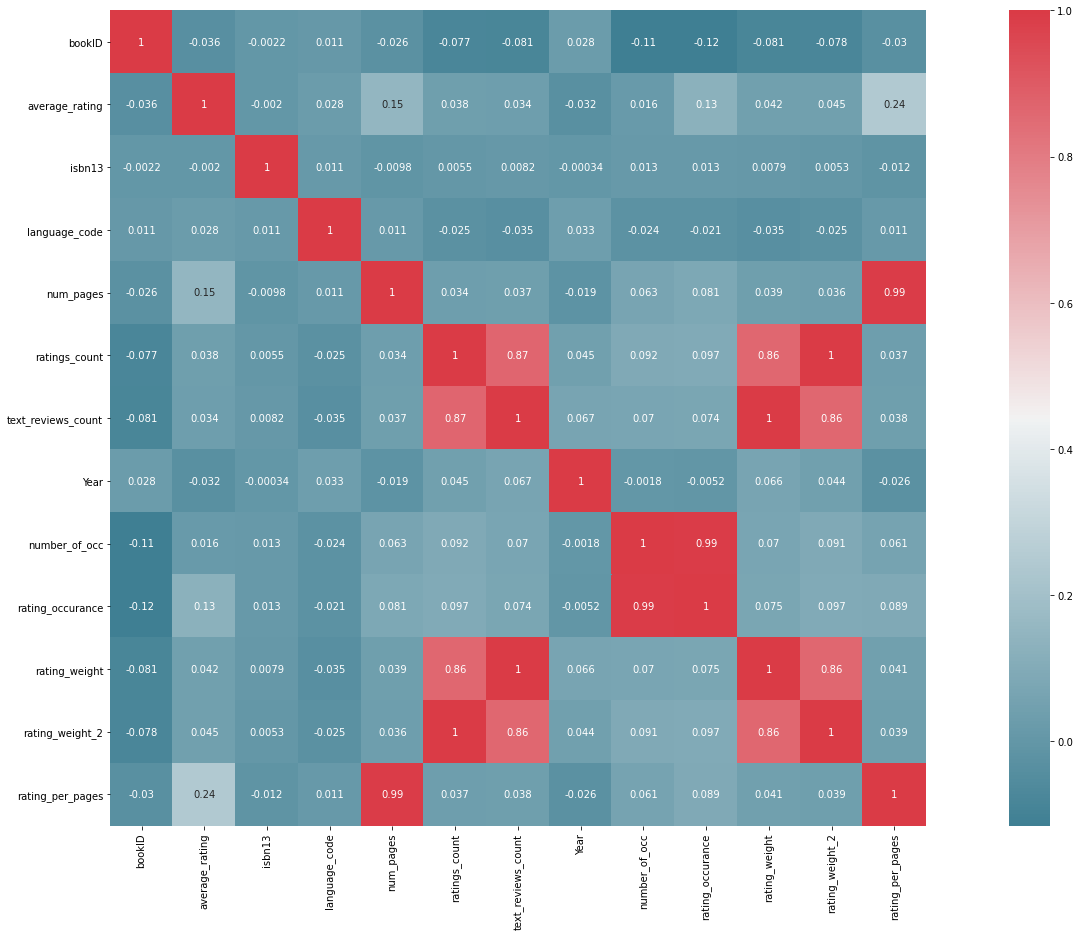

In [37]:
# preparing heatmap
fig = plt.gcf()
fig.set_size_inches(30,15)
sns.heatmap(corr_matrix, annot=True, square=True, 
            mask=np.zeros_like(corr_matrix, dtype=np.bool_),
            cmap=sns.diverging_palette(220,10,as_cmap=True))

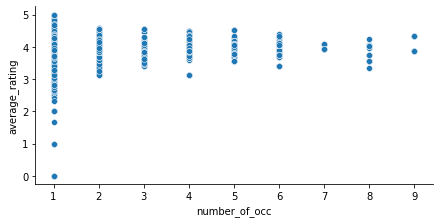

In [38]:
# Checking relational plot
sns.relplot(x='number_of_occ', y='average_rating', data=df, height=3, aspect=2) # Any book has appeared more than once has a good/high rate
plt.show()

<AxesSubplot:xlabel='Year', ylabel='average_rating'>

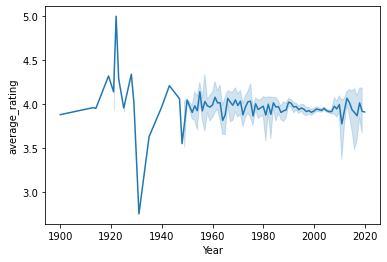

In [39]:
# Checking line plot
sns.lineplot(x = 'Year', y = 'average_rating', data=df)

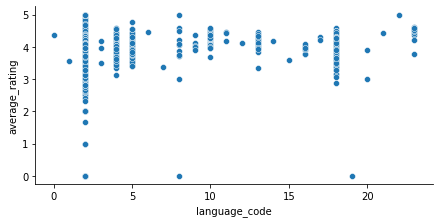

In [40]:
# checking relational plot
sns.relplot(x='language_code', y = 'average_rating', data= df, height=3, aspect=2)
plt.show()

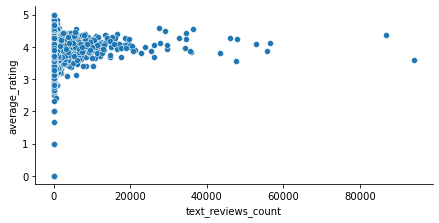

In [41]:
# checking relational plot
sns.relplot(x='text_reviews_count', y = 'average_rating', data=df, height=3, aspect=2)
plt.show()

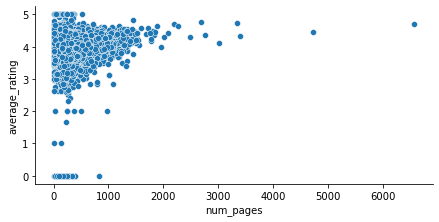

In [42]:
# checking relational plot
sns.relplot(x='num_pages', y = 'average_rating', data=df, height=3, aspect=2)
plt.show()

# We can see from the visual below that starting from the 80s, the rate/number of reviews is getting higher than before, We can say that this's the effect of the computer & internet

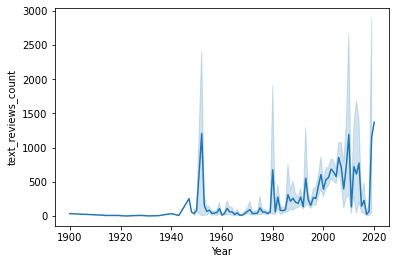

In [43]:
#  checking line plot
sns.lineplot(x='Year', y = 'text_reviews_count', data=df)
plt.show()


In [44]:
# Model Creation

In [45]:
y = df['average_rating'].values

In [46]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Year,number_of_occ,rating_occurance,rating_weight,rating_weight_2,rating_per_pages
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,2.0,652,2095690,27591,2006-09-16,Scholastic Inc.,2006,2,9.14,126090.87,9577303.30,2979.64
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,2.0,870,2153167,29221,2004-09-01,Scholastic Inc.,2004,1,4.49,131202.29,9667719.83,3906.30
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,2.0,352,6333,244,2003-11-01,Scholastic,2003,2,8.84,1078.48,27991.86,1555.84
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,2.0,435,2339585,36325,2004-05-01,Scholastic Inc.,2004,2,9.12,165642.00,10668507.60,1983.60
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,2.0,2690,41428,164,2004-09-13,Scholastic,2004,1,4.78,783.92,198025.84,12858.20


In [47]:
y

array([4.57, 4.49, 4.42, ..., 3.96, 3.72, 3.91])

In [48]:
# dropping necessary columns which are not significant for model building
cols = ['bookID', 'title', 'authors', 'isbn', 'isbn13', 'publication_date', 'publisher', 'average_rating']

In [49]:
X = df.drop(columns=cols, axis=1)

In [50]:
X.head()

,language_code,num_pages,ratings_count,text_reviews_count,Year,number_of_occ,rating_occurance,rating_weight,rating_weight_2,rating_per_pages
0,2.0,652,2095690,27591,2006,2,9.14,126090.87,9577303.30,2979.64
1,2.0,870,2153167,29221,2004,1,4.49,131202.29,9667719.83,3906.30
2,2.0,352,6333,244,2003,2,8.84,1078.48,27991.86,1555.84
3,2.0,435,2339585,36325,2004,2,9.12,165642.00,10668507.60,1983.60
4,2.0,2690,41428,164,2004,1,4.78,783.92,198025.84,12858.20


In [51]:
y

array([4.57, 4.49, 4.42, ..., 3.96, 3.72, 3.91])

In [52]:
# lets split the data into 70% and 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Data Modelling

### 1: Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)

### 2: KNN Regression

In [54]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

### 3: Decision Tree Regression

In [55]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
y_pred_dec = dec_tree.predict(X_test)

### 4: Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()
ran_for.fit(X_train, y_train)
y_pred_ran_for = ran_for.predict(X_test)

### 5: XGB Regressor

In [57]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

[13:24:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Model Evaluation

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [59]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_lin_reg)))
print("R2 score:", r2_score(y_test, y_pred_lin_reg))

Linear Regression: 
RMSE: 0.15665281550426013
R2 score: 0.7909873314752255


In [60]:
print("KNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("R2 score:", r2_score(y_test, y_pred_knn))

KNN regression: 
RMSE: 0.20683414997974192
R2 score: 0.6356316112809633


In [61]:
print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_dec)))
print("R2 score:", r2_score(y_test, y_pred_dec))

Decision tree regression: 
RMSE: 0.03526686650299068
R2 score: 0.9894067322806562


In [62]:
print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_ran_for)))
print("R2 score:", r2_score(y_test, y_pred_ran_for))

Random forest regression: 
RMSE: 0.031810779756560596
R2 score: 0.9913812391540567


In [63]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2 score:", r2_score(y_test, y_pred_xgb))

XGB regression: 
RMSE: 0.030490186422154158
R2 score: 0.9920819842758997


# Hyperparameter tuning

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]

In [66]:
params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

In [67]:
xgb_tune = XGBRegressor(verbosity = 0, random_state = 42)

In [68]:
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, random_state = 42)

In [69]:
xgb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=XGBRegressor(random_state=42, verbosity=0),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': ['0.01', '0.05', '0.1',
                                                          '0.25', '0.5', '0.75',
                                                          '1.0'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      20],
                                        'min_child_weight': [45, 46, 48, 50, 52,
                                                             53, 55, 57, 59, 61,
                                                             62, 64, 66, 68,
                                                             70]},
                   random_state=42)

In [70]:
xgb_cv.best_score_

0.9556536658662935

In [71]:
xgb_cv.best_params_

{'min_child_weight': 66,
 'max_depth': 11,
 'learning_rate': '1.0',
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [72]:
xgb_best = XGBRegressor(colsample_bytree = 0.7, gamma = 0.3, learning_rate = 1.0, max_depth = 11, 
                        min_child_weight = 66, verbosity = 0, random_state =42)

In [73]:
xgb_best.fit(X_train, y_train)

XGBRegressor(colsample_bytree=0.7, gamma=0.3, learning_rate=1.0, max_depth=11,
             min_child_weight=66, random_state=42, verbosity=0)

In [74]:
y_pred_xgb_best = xgb_best.predict(X_test)

In [75]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_xgb_best)))
print("R2 score:", r2_score(y_test, y_pred_xgb_best))

XGB regression: 
RMSE: 0.05779520134291951
R2 score: 0.971550164310578


# Conclusion:
In this project, we tried to build a model using various algorithms such as Linear regression, KNN regression, Decision tree regression, Random forest and XGB regressor to get the best possible prediction.

The hyperparameter tuned XGB regressor gives us the best rmse value and r2 score for this problem.

# Pickling the model file for deployment

In [76]:
import pickle

In [77]:
pickle.dump(xgb_best,open('regmodel17.pkl','wb'))

In [78]:
pickled_model=pickle.load(open('regmodel17.pkl','rb'))